# 3조 프로젝트 1
---
## 인터넷 쇼핑 검색 키워드를 중심으로 본 쇼핑 트랜드 분석
---

## 데이터 출처
---
### 네이버 데이터랩
### 셀러마스터
### 블랙키위
### 아이템스카우트
---

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

# 1. 카테고리별 Top 20 아이템 상품수/검색수 시각화 
---
- 네이버 데이터랩 카테고리별 Top 20 크롤링
- 셀러마스터 상품수, 검색수 자료 전처리 수동 및 자동화
- 검색수와 상품수/검색수 시각화
---

## (1) 네이버 데이터랩 카테고리별 top 500 20개 크롤링
---

### 예1) category 1. 패션의류 Top 20 크롤링 + list에 담기
---

In [3]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

# 창 열기 쇼핑인사이트
chrome_options = webdriver.ChromeOptions()
driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()), options = chrome_options)
driver.get(url='https://datalab.naver.com/shoppingInsight/sCategory.naver')

driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/div/div[2]/div[1]/span/label[3]').click() #1년단위 클릭
time.sleep(0.5)
driver.find_element(By.XPATH, '//*[@id="18_device_0"]').click() #기기별 클릭 - [0]은 전체, [1] pc, [2], 모바일
time.sleep(0.5)
driver.find_element(By.XPATH, '//*[@id="19_gender_0"]').click() #성별 클릭 - [0]은 전체, [1] 여성, [2] 남성
time.sleep(0.5)
driver.find_element(By.XPATH, '//*[@id="20_age_0"]').click() #연령별 클릭 - [0]은 전체, [1] 10대,~~~,[5] 50대, [6] 60대이상
time.sleep(0.5)


driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/div/div[1]/div/div[1]/span').click() #분야 클릭
time.sleep(0.5)

driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/div/div[1]/div/div[1]/ul/li[1]/a').click() # Category 선택
time.sleep(0.5)

driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/a').click() #조회하기 클릭
time.sleep(3)

nt20_1=[]
for j in range(1, 21) :
    result= driver.find_element(By.XPATH, f'//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[1]/ul/li[{j}]/a').text
    print(result.split('\n')[1])
    time.sleep(0.1)
    nt20_1.append(result.split('\n')[1])

# time.sleep(0.1)

원피스
트위드자켓
써스데이아일랜드원피스
숏패딩
블라우스
롱패딩
롱원피스
잠옷
나이키바람막이
핸드메이드코트
몽클레어여성패딩
맨투맨
니트원피스
여성패딩
지고트원피스
여성숏패딩
하객원피스
후드티
여성트레이닝세트
코트


In [40]:
url='https://datalab.naver.com/shoppingInsight/sCategory.naver'
driver = webdriver.Chrome()
driver.get(url)
driver.set_window_size(1920, 1080)
time.sleep(0.5)

# 분야 선택
profession=driver.find_elements(By.CSS_SELECTOR,'.form_row>.set_period.category>.select') # elements로 해야됨
f_profession=profession[0] # 위에있는 분야 클릭
s_profession=profession[1] # 아래에도 똑같은게 있어서 구분하게 나눔

time.sleep(0.5)
# f_profession.click() # 분야창 열기

time.sleep(0.5)
f_pfs=driver.find_elements(By.CSS_SELECTOR,'ul.select_list.scroll_cst>li')

# f_pfs[6].click() # 원하는 분야 클릭
# [0] 패션의류, [1] 패션잡화, [2] 화장품 미용, ~~~, [11] 도서

# 기간 선택
dat=driver.find_elements(By.CSS_SELECTOR,'.form_row>.set_period>span>label.period') # 기간
f_dat=dat[:4] # [0]은 1개월, [1] 3개월, [2] 1년, [3] 직접입력
s_dat=dat[-4:] # 아래꺼

time.sleep(0.5)
f_dat[2].click() # 1년 클릭 

# 기기별, 성별, 연령 체크리스트 가져옴
dv_gd_a=driver.find_elements(By.CSS_SELECTOR,'.form_row.form_float>.set_col.set_target_chk>.set_chk>span>label.lbl') 


f_dv_gd_a=dv_gd_a[:13] # 위에 있는 걸 클릭
s_dv_gd_a=dv_gd_a[-13:] # 아래꺼

f_dv=f_dv_gd_a[:3] # [0]은 전체, [1] pc, [2], 모바일
f_gd=f_dv_gd_a[3:6] # [0]은 전체, [1] 여성, [2] 남성
f_age=f_dv_gd_a[-7:] # [0]은 전체, [1] 10대,~~~,[5] 50대, [6] 60대이상

s_dv=s_dv_gd_a[:3] # 아래꺼
s_gd=s_dv_gd_a[3:6] # 아래꺼
s_age=s_dv_gd_a[-7:] # 아래꺼

time.sleep(0.5)
f_gd[2].click() # 남자 클릭

lookup=driver.find_elements(By.CSS_SELECTOR,'a.btn_submit') # 조회하기
f_lookup=lookup[0] # 위
s_lookup=lookup[1] # 아래

time.sleep(0.5)
f_lookup.click() # 조회하기 클릭

time.sleep(3)
# 나온 데이터 랭크 소스를 복사하기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
path = 'ul.rank_top1000_list>li'
trs = soup.select(path)
i=1
nt20kw-m_1 = []
# 랭크 인쇄하기
for r in trs:
    nt20kw-m_1.append(r.select('a')[0].text.split('{}'.format(i))[1].strip())
    i+=1
nt20kw-m_1

['남자경량패딩',
 '나이키바람막이',
 '바람막이',
 '남자맨투맨',
 '남자조거팬츠',
 '후드티',
 '남자패딩',
 '나이키반바지',
 '남자반바지',
 '롱패딩',
 '맨투맨',
 '남자가디건',
 '남자청바지',
 '남성트레이닝세트',
 '패딩조끼',
 '내셔널지오그래픽패딩',
 '남자롱패딩',
 '남자코트',
 '스톤아일랜드',
 'cp컴퍼니']

### 예2) 리스트를 txt에 저장

In [11]:
f = open('패션의류20.txt', 'w')

for i in 패션의류20:
    f.write(i)
    f.write('\n')

f.close()

### 예3) 네이버 데이터랩 top 500 크롤링

In [7]:
## from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

# 창 열기 쇼핑인사이트
chrome_options = webdriver.ChromeOptions()
driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()), options = chrome_options)
driver.get(url='https://datalab.naver.com/shoppingInsight/sCategory.naver')

driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/div/div[2]/div[1]/span/label[3]').click() #1년단위 클릭
time.sleep(0.5)
driver.find_element(By.XPATH, '//*[@id="18_device_0"]').click() #기기별 클릭
time.sleep(0.5)
driver.find_element(By.XPATH, '//*[@id="19_gender_0"]').click() #성별 클릭
time.sleep(0.5)
driver.find_element(By.XPATH, '//*[@id="20_age_0"]').click() #연령별 클릭
time.sleep(0.5)


driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/div/div[1]/div/div[1]/span').click() #분야 클릭
time.sleep(0.5)

driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/div/div[1]/div/div[1]/ul/li[1]/a').click() #디지털/가전 클릭
time.sleep(0.5)

driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[1]/div/a').click() #조회하기 클릭
time.sleep(3)

nt500_1=[]
for i in range(1,26):
    for j in range(1, 21) :
        result= driver.find_element(By.XPATH, f'//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[1]/ul/li[{j}]/a').text
        print(result.split('\n')[1])
        time.sleep(0.1)
        nt500_1.append(result.split('\n')[1])
        
    driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/a[2]').click()

원피스
트위드자켓
써스데이아일랜드원피스
숏패딩
블라우스
롱패딩
롱원피스
잠옷
나이키바람막이
핸드메이드코트
몽클레어여성패딩
니트원피스
맨투맨
여성패딩
여성숏패딩
지고트원피스
하객원피스
후드티
여성트레이닝세트
코트
원피스
잇미샤원피스
가디건
후드집업
바람막이
모조에스핀원피스
여성경량패딩
패딩조끼
모조에스핀
여성롱패딩
케네스레이디원피스
트위드원피스
내셔널지오그래픽패딩
여성가디건
뷔스티에원피스
여성코트
커플잠옷
패딩
남자경량패딩
니트
써스데이아일랜드
폴로니트
트렌치코트
스포츠브라
시슬리원피스
여름원피스
캐시미어코트
잇미샤
남자패딩
남자맨투맨
스커트
티셔츠
경량패딩
라이프워크
지컷원피스
쥬시쥬디
쉬폰원피스
나이키후드티
스튜디오톰보이
에고이스트원피스
에고이스트
듀엘
올리비아로렌
플라스틱아일랜드
남자롱패딩
플라스틱아일랜드원피스
온앤온원피스
나이키맨투맨
폴로랄프로렌
여성점프수트
여성블라우스
데님원피스
스톤아일랜드
로엠원피스
조거팬츠
수면잠옷
롱스커트
베네통
남자가디건
나이키반바지
남자조거팬츠
폴로가디건
듀엘원피스
남성트레이닝세트
여성원피스
여자조거팬츠
버버리패딩
셔츠원피스
발렌시아
니트조끼
여자롱패딩
아노락
여성자켓
브라렛
오즈세컨
보니스팍스
청바지
쉬즈미스
여성팬티
셀프웨딩드레스
버버리퀼팅자켓
후리스
지오다노경량패딩
남자청바지
자라
점퍼
여성티셔츠
아디다스바람막이
남자숏패딩
무스너클패딩
남성패딩
라코스테원피스
여성패딩조끼
몽클레어남자패딩
플리츠스커트
메종키츠네가디건
린원피스
케네스레이디
스톤아일랜드맨투맨
jj지고트원피스
제시뉴욕
cp컴퍼니
남자팬티
남자코트
쉬즈미스원피스
캘빈클라인언더웨어
타미힐피거
폴로셔츠
파자마
지컷
코듀로이팬츠
리스트코트
반티
남자니트
샤틴원피스
여자속옷
바스락원피스
메종키츠네
스톤아일랜드패딩
여성맨투맨
제시뉴욕
내셔널지오그래픽
쉬즈미스코트
여성니트티
로엠
스퀘어넥원피스
톰보이
메종키츠네반팔
다이나핏
보웬
라코스테
베네통원피스
써스데이아일랜드블라우스
라코스테가디건
시슬리
여성니트조끼
미니원피스
플리츠원피스
에고이스트패딩
남자패딩조끼
여름가디건
겨울원피

In [4]:
len(nt500_3)

500

In [8]:
f = open('nt500_1.txt', 'w')

for i in nt500_1:
    f.write(i)
    f.write('\n')

f.close()

In [ ]:
url='https://datalab.naver.com/shoppingInsight/sCategory.naver'
driver = webdriver.Chrome()
driver.get(url)
driver.set_window_size(1920, 1080)
time.sleep(0.5)

# 분야 선택
profession=driver.find_elements(By.CSS_SELECTOR,'.form_row>.set_period.category>.select') # elements로 해야됨
f_profession=profession[0] # 위에있는 분야 클릭
s_profession=profession[1] # 아래에도 똑같은게 있어서 구분하게 나눔

time.sleep(0.5)
f_profession.click() # 분야창 열기

time.sleep(0.5)
f_pfs=driver.find_elements(By.CSS_SELECTOR,'ul.select_list.scroll_cst>li')

f_pfs[2].click() # 원하는 분야 클릭
# [0] 패션의류, [1] 패션잡화, [2] 화장품 미용, ~~~, [11] 도서

# 기간 선택
dat=driver.find_elements(By.CSS_SELECTOR,'.form_row>.set_period>span>label.period') # 기간
f_dat=dat[:4] # [0]은 1개월, [1] 3개월, [2] 1년, [3] 직접입력
s_dat=dat[-4:] # 아래꺼

time.sleep(0.5)
f_dat[2].click() # 1년 클릭 

# 기기별, 성별, 연령 체크리스트 가져옴
dv_gd_a=driver.find_elements(By.CSS_SELECTOR,'.form_row.form_float>.set_col.set_target_chk>.set_chk>span>label.lbl') 


f_dv_gd_a=dv_gd_a[:13] # 위에 있는 걸 클릭
s_dv_gd_a=dv_gd_a[-13:] # 아래꺼

f_dv=f_dv_gd_a[:3] # [0]은 전체, [1] pc, [2], 모바일
f_gd=f_dv_gd_a[3:6] # [0]은 전체, [1] 여성, [2] 남성
f_age=f_dv_gd_a[-7:] # [0]은 전체, [1] 10대,~~~,[5] 50대, [6] 60대이상

s_dv=s_dv_gd_a[:3] # 아래꺼
s_gd=s_dv_gd_a[3:6] # 아래꺼
s_age=s_dv_gd_a[-7:] # 아래꺼

time.sleep(0.5)
f_gd[2].click() # 남자 클릭

lookup=driver.find_elements(By.CSS_SELECTOR,'a.btn_submit') # 조회하기
f_lookup=lookup[0] # 위
s_lookup=lookup[1] # 아래

time.sleep(0.5)
f_lookup.click() # 조회하기 클릭

time.sleep(3)

i=1
rank = []
# 나온 데이터 랭크 소스를 복사하기
while True:
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        path = 'ul.rank_top1000_list>li'
        trs = soup.select(path)

        # 랭크 인쇄하기
        for r in trs:
            rank.append(r.select('a')[0].text.split('{}'.format(i))[1].strip())
            i+=1
        n_rank=driver.find_element(By.CLASS_NAME, 'btn_page_next')
        n_rank.click()
        time.sleep(3)
    except:
        break

## (2) 셀러마스터 자동화 - 조회수, 상품재고수 자료 추출 + 상품재고수/검색수(비율) 
---

In [46]:
url='https://whereispost.com/seller/'
driver = webdriver.Chrome()
driver.get(url)
driver.set_window_size(1920, 1080)
time.sleep(0.5)

for r in nt20kw-f_3:
    elem = driver.find_element('id', 'keyword')
    elem.send_keys(r)
    search=driver.find_element(By.CSS_SELECTOR,'button>.fas.fa-search')
    search.click()

    time.sleep(5)

## (3) Category별 Top20 월별검색수 시각화
---

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
nt20sm_1 = pd.read_csv('./data_files/nt20sm_1.csv')

In [6]:
nt20sm_2 = pd.read_csv('./data_files/nt20sm_2.csv')

In [7]:
nt20sm_3 = pd.read_csv('./data_files/nt20sm_3.csv')

In [8]:
nt20sm_4 = pd.read_csv('./data_files/nt20sm_4.csv')

In [9]:
nt20sm_5 = pd.read_csv('./data_files/nt20sm_5.csv')

In [10]:
nt20sm_5 = nt20sm_5.rename(columns={'-':'키워드', '키워드':'PC 검색량', 'PC 검색량': '모바일 검색량',\
                          '모바일 검색량':'총조회수', '총조회수':'상품수','상품수':'비율','비율':'비고'})

In [11]:
nt20sm_5['총조회수'] =nt20sm_5['총조회수'].apply(lambda x: x.replace(',',''))

In [12]:
nt20sm_5['총조회수'] = pd.to_numeric(nt20sm_5['총조회수'])

In [13]:
nt20sm_5['검색수'] = nt20sm_5['총조회수'] / nt20sm_5['총조회수'].max()

In [14]:
nt20sm_5['상품수/검색수'] =nt20sm_5['비율'] / nt20sm_5['비율'].max()

In [15]:
nt20sm_5 = nt20sm_5.drop(['PC 검색량','모바일 검색량','총조회수','상품수','비율','비고'], axis=1)

In [16]:
nt20sm_5.sort_values(by=['상품수/검색수'], inplace=True)

<AxesSubplot:title={'center':'인테리어'}, xlabel='키워드'>

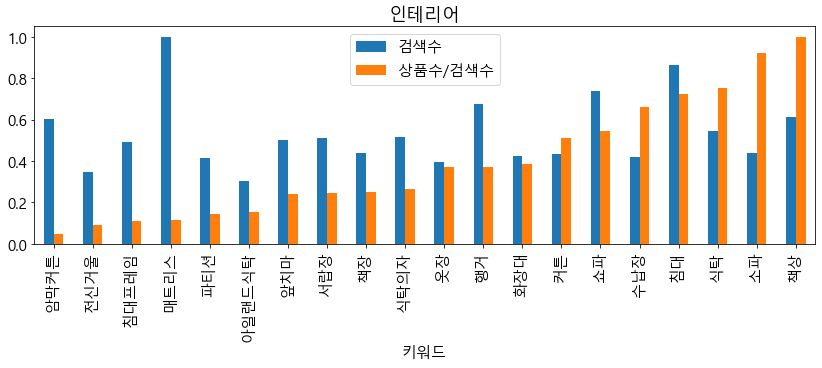

In [17]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (14,4)
nt20sm_5.plot.bar(x='키워드', title='인테리어')

In [ ]:
# nt20sm_5 = pd.read_csv('./data_files/nt20sm_5.csv', index_col=0)

# nt20sm_5 = nt20sm_5.rename(columns={'-':'키워드', '키워드':'PC 검색량', 'PC 검색량': '모바일 검색량',\
#                           '모바일 검색량':'총조회수', '총조회수':'상품수','상품수':'비율','비율':'비고'})

# nt20sm_5['총조회수'] =nt20sm_5['총조회수'].apply(lambda x: x.replace(',',''))

# nt20sm_5['총조회수'] = pd.to_numeric(nt20sm_5['총조회수'])

# nt20sm_5['검색수'] = nt20sm_5['총조회수'] / nt20sm_5['총조회수'].max()

# nt20sm_5['검색수/상품수'] =nt20sm_5['비율'] / nt20sm_5['비율'].max()

# nt20sm_5 = nt20sm_5.drop(['PC 검색량','모바일 검색량','총조회수','상품수','비율','비고'], axis=1)

# plt.rcParams["font.family"] = 'Malgun Gothic'
# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = (14,4)
# nt20sm_5.plot.bar(x='키워드', title='디지털/가전 여성')

# 2. Top20 월별 검색수 전처리 및 누적 증감율 시각화
---
- 블랙키위 추출자료 수집 및 전처리 => 시각화
- pct_change(), cumprod() 함수 사용 누적 증감율 구하기 => 시각화

## (1) 블랙키위 추출자료 불러오기
---

In [5]:
import pandas as pd
import numpy as np

In [78]:
fa01_df = pd.read_csv('./data_files/패션의류_월간검색트렌드_1.csv')
fa01_df

,period,searchVolume
0,2019-10,213600
1,2019-11,251000
2,2019-12,256700
3,2020-01,199800
4,2020-02,236900
5,2020-03,366700
6,2020-04,616500
7,2020-05,1021500
8,2020-06,1148600
9,2020-07,968000


## (2) 블랙키위 데이터 전처리 자동화

In [18]:
count = 1
dflis = pd.read_csv('./data_files1/패션의류_월간검색트렌드_1.csv')
dflis.drop('searchVolume', axis=1, inplace=True)  # period column만 남기기 위해

for li in nt20_1:  # 'nt20_1'은 네이버 데이터랩 T20 해당 카테고리 아이템 리스트
    
    df = pd.read_csv('./data_files/패션의류_월간검색트렌드_{}.csv'.format(count))
    
    df.rename(columns={'searchVolume':li}, inplace=True)  # 아이템 이름 수정 자동화
    
    df.drop('period', axis=1, inplace=True)
    
    count += 1
    
    dflis = pd.concat([dflis,df], axis=1)
    
dflis.to_csv('nt20kw_1.csv', encoding='utf-8-sig')  # csv명에 저장할 이름 입력

## (3) 시각화

In [5]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
nt20kw_2 = pd.read_csv('./data_files/nt20kw_2.csv', index_col=0)
nt20kw_2.head()

,period,크록스,나이키운동화,운동화,나이키에어포스,슬리퍼,아디다스운동화,카드지갑,에코백,뉴발란스327,...,스케쳐스운동화,셀린느가방,뉴발란스운동화,나이키에어맥스,크로스백,루이비통가방,나이키에어맥스97,크록스슬리퍼,백팩,나이키
0,2019-10,213600,459500,201200,76700,137000,190600,159500,205000,0,...,87100,107200,92500,177800,138100,284400,529800,47700,169600,2481100
1,2019-11,251000,485600,205300,96500,139200,191700,149300,160800,0,...,80700,106200,97600,199600,128600,298900,595800,40400,149900,4042500
2,2019-12,256700,427100,192200,92500,110900,170300,178700,147500,0,...,65900,118200,88600,202000,136300,359600,598600,31100,163600,2735900
3,2020-01,199800,443500,209100,107300,145900,177200,219000,164900,240,...,68700,138500,98400,224500,160400,388900,633800,49400,240600,2502800
4,2020-02,236900,473200,231200,116200,243200,182500,212100,186100,200,...,154400,135800,91200,203300,151400,303800,553300,76300,253500,2945900


In [20]:
nt20kw_2 = nt20kw_2.set_index('period')
nt20kw_2.head()

,크록스,나이키운동화,운동화,나이키에어포스,슬리퍼,아디다스운동화,카드지갑,에코백,뉴발란스327,나이키데이브레이크,스케쳐스운동화,셀린느가방,뉴발란스운동화,나이키에어맥스,크로스백,루이비통가방,나이키에어맥스97,크록스슬리퍼,백팩,나이키
period,,,,,,,,,,,,,,,,,,,,
2019-10,213600,459500,201200,76700,137000,190600,159500,205000,0,256100,87100,107200,92500,177800,138100,284400,529800,47700,169600,2481100
2019-11,251000,485600,205300,96500,139200,191700,149300,160800,0,289400,80700,106200,97600,199600,128600,298900,595800,40400,149900,4042500
2019-12,256700,427100,192200,92500,110900,170300,178700,147500,0,360800,65900,118200,88600,202000,136300,359600,598600,31100,163600,2735900
2020-01,199800,443500,209100,107300,145900,177200,219000,164900,240,514500,68700,138500,98400,224500,160400,388900,633800,49400,240600,2502800
2020-02,236900,473200,231200,116200,243200,182500,212100,186100,200,734700,154400,135800,91200,203300,151400,303800,553300,76300,253500,2945900


<AxesSubplot:xlabel='period'>

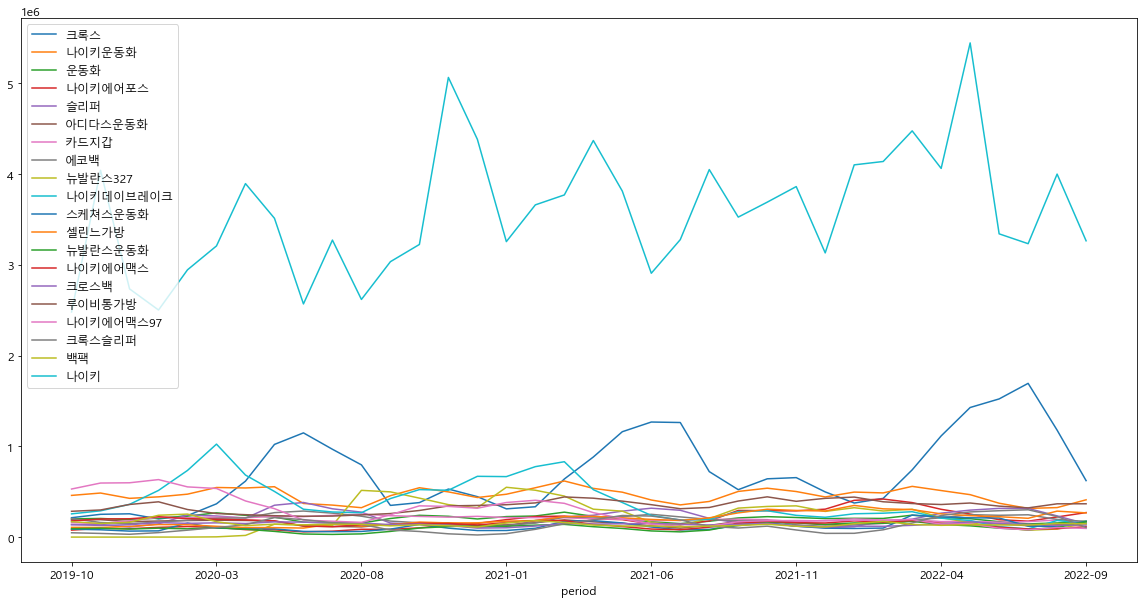

In [21]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
nt20kw_2.plot(kind='line', figsize=(20,10))

In [60]:
nt20kw_1 = pd.read_csv('./data_files/nt20kw_1.csv', index_col=0)
nt20kw_1.head()

,period,원피스,트위드자켓,써스데이아일랜드원피스,숏패딩,블라우스,롱패딩,롱원피스,잠옷,나이키바람막이,...,몽클레어여성패딩,니트원피스,맨투맨,여성패딩,여성숏패딩,지고트원피스,하객원피스,후드티,여성트레이닝세트,코트
0,2019-10,368800,153900,44300,217100,97300,279600,106100,139400,176800,...,124600,187600,357700,35800,29400,24400,122100,319200,100700,97800
1,2019-11,324600,79700,42900,653100,63600,926800,79500,148500,48300,...,320700,216400,214300,161900,313500,20700,101500,219900,74100,180000
2,2019-12,371000,61600,41100,368800,65200,489000,68800,172600,32700,...,329600,185000,182000,147300,271100,20800,61400,171700,63000,148200
3,2020-01,389500,120300,48900,213200,80200,146400,77800,136200,77300,...,184100,108300,183300,63700,182000,21700,58900,164000,80800,116600
4,2020-02,382400,231000,52600,92200,122400,58500,87500,156800,183400,...,79100,59300,189500,25800,83600,26400,70600,166500,79200,84500


In [61]:
nt20kw_1 = nt20kw_1.set_index('period')
nt20kw_1.head()

,원피스,트위드자켓,써스데이아일랜드원피스,숏패딩,블라우스,롱패딩,롱원피스,잠옷,나이키바람막이,핸드메이드코트,몽클레어여성패딩,니트원피스,맨투맨,여성패딩,여성숏패딩,지고트원피스,하객원피스,후드티,여성트레이닝세트,코트
period,,,,,,,,,,,,,,,,,,,,
2019-10,368800,153900,44300,217100,97300,279600,106100,139400,176800,145200,124600,187600,357700,35800,29400,24400,122100,319200,100700,97800
2019-11,324600,79700,42900,653100,63600,926800,79500,148500,48300,272800,320700,216400,214300,161900,313500,20700,101500,219900,74100,180000
2019-12,371000,61600,41100,368800,65200,489000,68800,172600,32700,164500,329600,185000,182000,147300,271100,20800,61400,171700,63000,148200
2020-01,389500,120300,48900,213200,80200,146400,77800,136200,77300,118600,184100,108300,183300,63700,182000,21700,58900,164000,80800,116600
2020-02,382400,231000,52600,92200,122400,58500,87500,156800,183400,85500,79100,59300,189500,25800,83600,26400,70600,166500,79200,84500


<AxesSubplot:xlabel='period'>

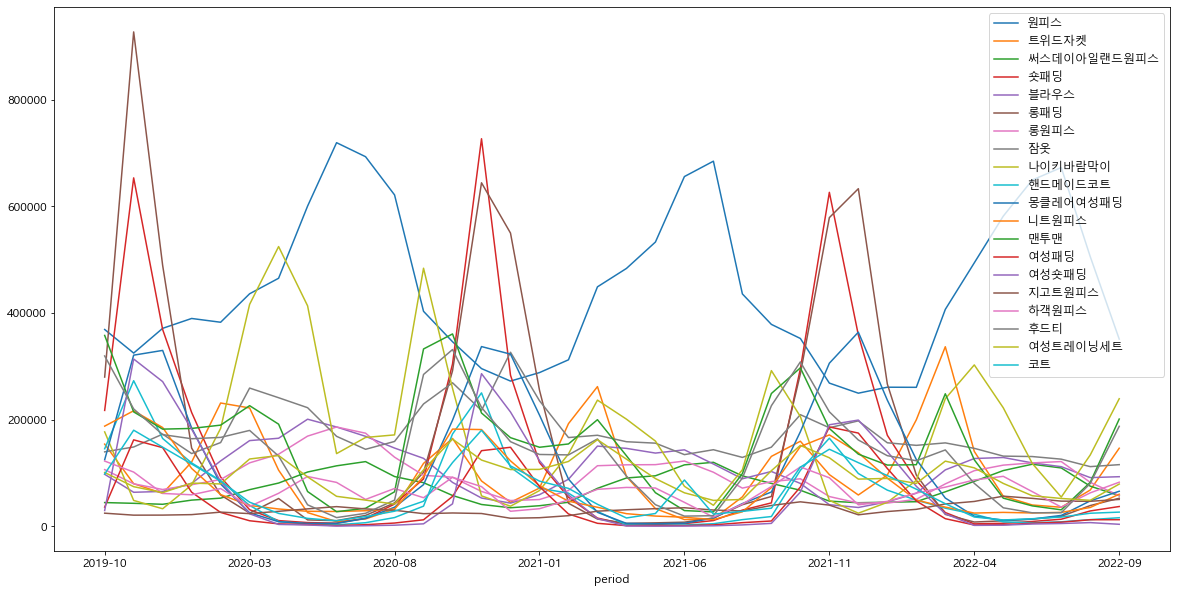

In [48]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

nt20kw_1.plot(kind='line', figsize=(20,10))

In [55]:
nt20kw_3 = pd.read_csv('./data_files/nt20kw_3.csv', index_col=0)
nt20kw_3

,period,ahc아이크림,가히멀티밤,닥터지선크림,디올립글로우,록시땅핸드크림,모다모다블랙샴푸,바디로션,바디미스트,바디워시,...,선크림,설화수,설화수자음2종,염색약,인셀덤,인셀덤화장품,입생로랑쿠션,핸드크림,헤라블랙쿠션,헤어에센스
0,2019-10,78300,0,41900,35100,86900,0,62100,20500,48800,...,43100,66400,2040,43300,138700,33500,71000,55700,103200,55400
1,2019-11,90600,0,41800,39800,128500,0,84300,21800,50800,...,41700,72900,2540,43600,175600,38800,88700,95600,136800,59600
2,2019-12,102900,0,40700,61100,176700,0,76600,21300,55100,...,37100,81000,2860,51700,207800,42900,81700,96700,110800,59100
3,2020-01,132300,0,28700,121100,114000,0,68000,23900,68100,...,48700,97400,4320,59400,229900,41900,80800,53400,123500,67400
4,2020-02,107700,0,43300,89400,110900,0,63800,24800,64000,...,53100,65600,2050,59400,234100,38400,76600,62200,111400,67000
5,2020-03,98400,0,62400,70300,75700,0,77400,34100,66700,...,71900,69400,2340,79200,222200,31900,59200,62700,91100,74700
6,2020-04,102100,0,81100,52000,68700,0,77800,28300,58100,...,83800,89100,4370,67800,216700,35300,42600,57700,90400,72100
7,2020-05,79400,23300,112900,54000,68700,0,49700,34100,58400,...,102800,87200,3900,59500,222300,34800,44800,38700,107000,74600
8,2020-06,55800,6390,96600,35800,28200,0,37300,34200,65500,...,112200,56400,12900,54200,197600,46400,39800,23600,100000,62400
9,2020-07,59600,3410,59600,42400,30500,0,34200,32500,70600,...,72800,58300,40900,56500,195400,71800,52200,24800,103600,68000


In [56]:
nt20kw_3 = nt20kw_3.set_index('period')
nt20kw_3.head()

,ahc아이크림,가히멀티밤,닥터지선크림,디올립글로우,록시땅핸드크림,모다모다블랙샴푸,바디로션,바디미스트,바디워시,샴푸,선크림,설화수,설화수자음2종,염색약,인셀덤,인셀덤화장품,입생로랑쿠션,핸드크림,헤라블랙쿠션,헤어에센스
period,,,,,,,,,,,,,,,,,,,,
2019-10,78300,0,41900,35100,86900,0,62100,20500,48800,83000,43100,66400,2040,43300,138700,33500,71000,55700,103200,55400
2019-11,90600,0,41800,39800,128500,0,84300,21800,50800,89100,41700,72900,2540,43600,175600,38800,88700,95600,136800,59600
2019-12,102900,0,40700,61100,176700,0,76600,21300,55100,83600,37100,81000,2860,51700,207800,42900,81700,96700,110800,59100
2020-01,132300,0,28700,121100,114000,0,68000,23900,68100,84200,48700,97400,4320,59400,229900,41900,80800,53400,123500,67400
2020-02,107700,0,43300,89400,110900,0,63800,24800,64000,87900,53100,65600,2050,59400,234100,38400,76600,62200,111400,67000


<AxesSubplot:xlabel='period'>

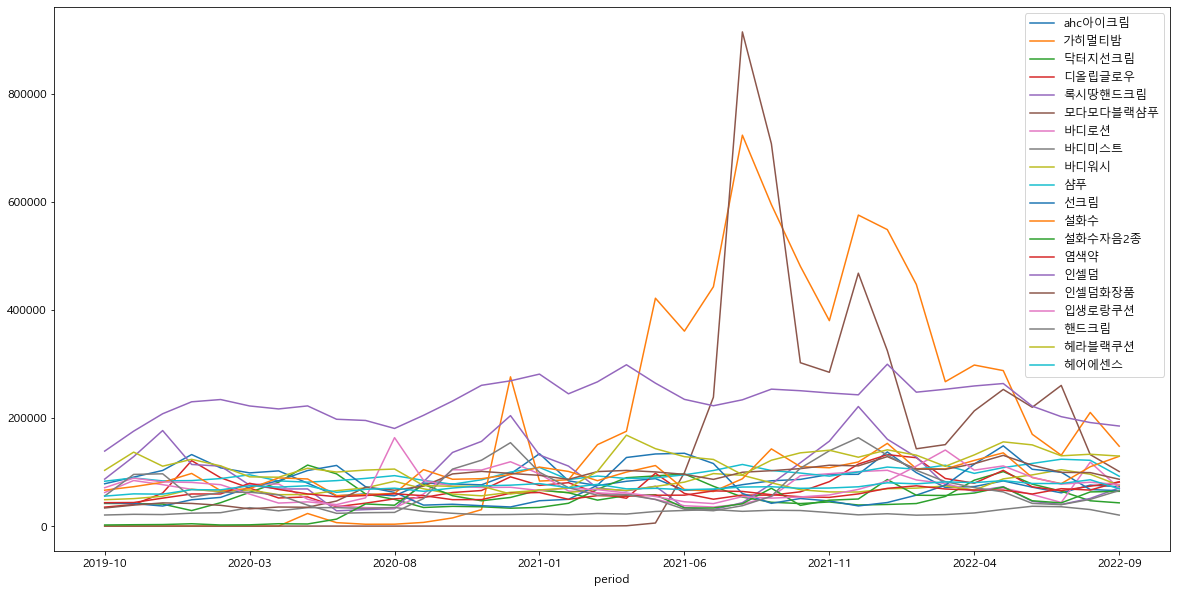

In [57]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

nt20kw_3.plot(kind='line', figsize=(20,10))

In [58]:
nt20kw_4 = pd.read_csv('./data_files/nt20kw_4.csv', index_col=0)
nt20kw_4.head()

,period,가습기,갤럭시z플립3,갤럭시z플립3케이스,갤럭시워치4,김치냉장고,냉장고,노트북,닌텐도스위치oled,닌텐도스위치,...,무선청소기,벽걸이에어컨,블루투스스피커,선풍기,에어컨,에어팟3세대,에어팟프로,에어프라이어,전자레인지,제습기
0,2019-10,359100,0,0,490,148000,241100,351800,0,494600,...,155600,24500,226800,25800,61700,630800,3057800,590900,170500,87200
1,2019-11,664500,0,0,290,323100,254400,385300,0,861200,...,167500,23900,222500,16900,64300,228200,1916100,732300,175200,74800
2,2019-12,625800,0,0,210,173300,244300,490500,0,1135900,...,182300,24500,258200,13900,66600,146900,1301900,830500,191300,70700
3,2020-01,363100,0,0,220,126400,275400,579200,0,929700,...,184800,35600,281200,14900,93700,112300,1137800,679500,211600,76400
4,2020-02,288200,0,0,210,115400,288300,565700,0,1015100,...,190500,55900,250000,21800,126900,66100,942500,728400,251600,78200


In [59]:
nt20kw_4 = nt20kw_4.set_index('period')
nt20kw_4.head()

,가습기,갤럭시z플립3,갤럭시z플립3케이스,갤럭시워치4,김치냉장고,냉장고,노트북,닌텐도스위치oled,닌텐도스위치,다이슨에어랩,무선청소기,벽걸이에어컨,블루투스스피커,선풍기,에어컨,에어팟3세대,에어팟프로,에어프라이어,전자레인지,제습기
period,,,,,,,,,,,,,,,,,,,,
2019-10,359100,0,0,490,148000,241100,351800,0,494600,184600,155600,24500,226800,25800,61700,630800,3057800,590900,170500,87200
2019-11,664500,0,0,290,323100,254400,385300,0,861200,220800,167500,23900,222500,16900,64300,228200,1916100,732300,175200,74800
2019-12,625800,0,0,210,173300,244300,490500,0,1135900,269100,182300,24500,258200,13900,66600,146900,1301900,830500,191300,70700
2020-01,363100,0,0,220,126400,275400,579200,0,929700,326500,184800,35600,281200,14900,93700,112300,1137800,679500,211600,76400
2020-02,288200,0,0,210,115400,288300,565700,0,1015100,363900,190500,55900,250000,21800,126900,66100,942500,728400,251600,78200


<AxesSubplot:xlabel='period'>

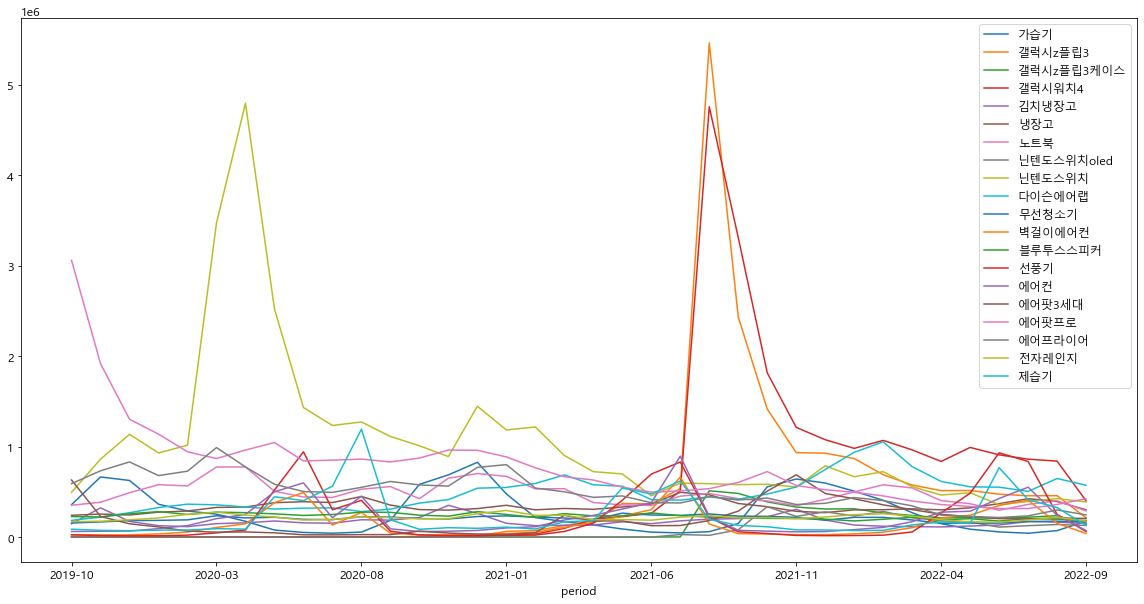

In [60]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

nt20kw_4.plot(kind='line', figsize=(20,10))

In [61]:
nt20kw_5 = pd.read_csv('./data_files/nt20kw_5.csv', index_col=0)
nt20kw_5.head()

,period,매트리스,서랍장,소파,쇼파,수납장,식탁,식탁의자,아일랜드식탁,암막커튼,옷장,전신거울,책상,침대,침대프레임,커튼,파티션,행거,화장대
0,2019-10,183900,141400,93700,188500,97400,116600,84700,84400,150400,105400,95900,160100,236200,94600,154900,89700,211400,144400
1,2019-11,164300,147100,94000,197100,103400,127800,90100,90400,169500,109900,99300,169500,228400,92900,189300,102700,264900,152600
2,2019-12,167900,148300,100200,206600,108800,144500,99600,95900,159900,112700,106800,193600,241400,105600,188300,102400,262800,165300
3,2020-01,197500,161000,108500,227900,116800,165900,108500,100600,134800,120400,112100,234400,282500,113700,168500,106400,235400,183300
4,2020-02,222500,183500,120000,248700,137300,182300,126000,115600,160900,136500,142200,282000,319400,132300,199200,123200,259800,208500


In [63]:
nt20kw_5 = indf.set_index('period')
nt20kw_5.head()

,매트리스,서랍장,소파,쇼파,수납장,식탁,식탁의자,아일랜드식탁,암막커튼,옷장,전신거울,책상,침대,침대프레임,커튼,파티션,행거,화장대
period,,,,,,,,,,,,,,,,,,
2019-10,183900,141400,93700,188500,97400,116600,84700,84400,150400,105400,95900,160100,236200,94600,154900,89700,211400,144400
2019-11,164300,147100,94000,197100,103400,127800,90100,90400,169500,109900,99300,169500,228400,92900,189300,102700,264900,152600
2019-12,167900,148300,100200,206600,108800,144500,99600,95900,159900,112700,106800,193600,241400,105600,188300,102400,262800,165300
2020-01,197500,161000,108500,227900,116800,165900,108500,100600,134800,120400,112100,234400,282500,113700,168500,106400,235400,183300
2020-02,222500,183500,120000,248700,137300,182300,126000,115600,160900,136500,142200,282000,319400,132300,199200,123200,259800,208500


<AxesSubplot:xlabel='period'>

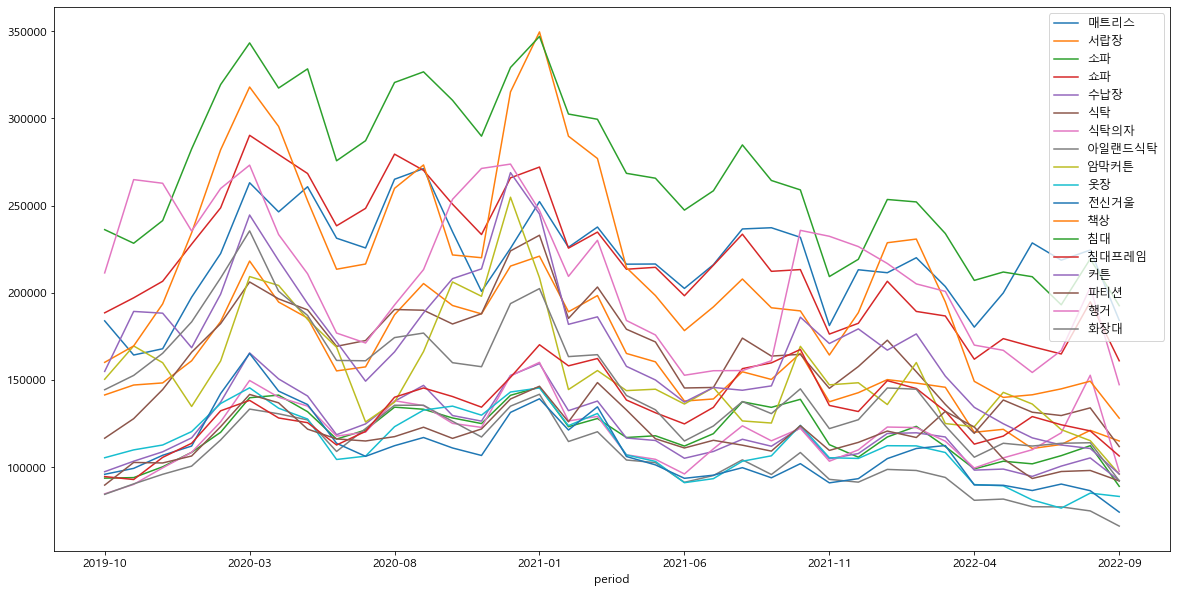

In [64]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

nt20kw_5.plot(kind='line', figsize=(20,10))

## (4) Top20 검색수 누적증감율 => 시각화

In [ ]:
# indf = pd.read_csv('./data_files/nt20kw_5.csv')

# indf = indf.drop('Unnamed: 0', axis=1)  # 필요없는 column 삭제

# indf = indf.set_index('period')  # 날짜 column을 index로 변환

# indf_pct = indf.pct_change()  # pct_change() 함수로 증가율 계산

# indf_pct = indf_pct.replace([np.inf, -np.inf], np.nan)  # inf값을 nan으로 변환

# indf_pct = indf_pct.fillna(0)  # 전체 nan값을 0으로 변환

# indf_cum = (indf_pct + 1).cumprod()  # 증가율 값에 1을 더한 후 누적곱(최근 변화에 더 비중을 주기 위해서..)

# plt.rcParams["font.family"] = 'Malgun Gothic'
# plt.rcParams["font.size"] = 12
# plt.rcParams["figure.figsize"] = (14,4)
# indf_cum.plot(figsize=(20,10), title='**검색수누적증가율')

In [242]:
indf = pd.read_csv('./data_files/nt20kw_5.csv')

In [243]:
indf = indf.drop('Unnamed: 0', axis=1)
indf.head()

,period,매트리스,서랍장,소파,쇼파,수납장,식탁,식탁의자,아일랜드식탁,암막커튼,옷장,전신거울,책상,침대,침대프레임,커튼,파티션,행거,화장대
0,2019-10,183900,141400,93700,188500,97400,116600,84700,84400,150400,105400,95900,160100,236200,94600,154900,89700,211400,144400
1,2019-11,164300,147100,94000,197100,103400,127800,90100,90400,169500,109900,99300,169500,228400,92900,189300,102700,264900,152600
2,2019-12,167900,148300,100200,206600,108800,144500,99600,95900,159900,112700,106800,193600,241400,105600,188300,102400,262800,165300
3,2020-01,197500,161000,108500,227900,116800,165900,108500,100600,134800,120400,112100,234400,282500,113700,168500,106400,235400,183300
4,2020-02,222500,183500,120000,248700,137300,182300,126000,115600,160900,136500,142200,282000,319400,132300,199200,123200,259800,208500


In [244]:
indf = indf.set_index('period')

In [245]:
indf_pct = indf.pct_change()
indf_pct.head()

,매트리스,서랍장,소파,쇼파,수납장,식탁,식탁의자,아일랜드식탁,암막커튼,옷장,전신거울,책상,침대,침대프레임,커튼,파티션,행거,화장대
period,,,,,,,,,,,,,,,,,,
2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11,-0.106580,0.040311,0.003202,0.045623,0.061602,0.096055,0.063754,0.071090,0.126995,0.042694,0.035454,0.058713,-0.033023,-0.017970,0.222079,0.144928,0.253075,0.056787
2019-12,0.021911,0.008158,0.065957,0.048199,0.052224,0.130673,0.105438,0.060841,-0.056637,0.025478,0.075529,0.142183,0.056918,0.136706,-0.005283,-0.002921,-0.007928,0.083224
2020-01,0.176295,0.085637,0.082834,0.103098,0.073529,0.148097,0.089357,0.049009,-0.156973,0.068323,0.049625,0.210744,0.170257,0.076705,-0.105151,0.039062,-0.104262,0.108893
2020-02,0.126582,0.139752,0.105991,0.091268,0.175514,0.098855,0.161290,0.149105,0.193620,0.133721,0.268510,0.203072,0.130619,0.163588,0.182196,0.157895,0.103653,0.137480


In [246]:
indf_pct = indf_pct.replace([np.inf, -np.inf], np.nan)

In [247]:
indf_pct = indf_pct.fillna(0)

In [248]:
indf_pct.head()

,매트리스,서랍장,소파,쇼파,수납장,식탁,식탁의자,아일랜드식탁,암막커튼,옷장,전신거울,책상,침대,침대프레임,커튼,파티션,행거,화장대
period,,,,,,,,,,,,,,,,,,
2019-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-11,-0.106580,0.040311,0.003202,0.045623,0.061602,0.096055,0.063754,0.071090,0.126995,0.042694,0.035454,0.058713,-0.033023,-0.017970,0.222079,0.144928,0.253075,0.056787
2019-12,0.021911,0.008158,0.065957,0.048199,0.052224,0.130673,0.105438,0.060841,-0.056637,0.025478,0.075529,0.142183,0.056918,0.136706,-0.005283,-0.002921,-0.007928,0.083224
2020-01,0.176295,0.085637,0.082834,0.103098,0.073529,0.148097,0.089357,0.049009,-0.156973,0.068323,0.049625,0.210744,0.170257,0.076705,-0.105151,0.039062,-0.104262,0.108893
2020-02,0.126582,0.139752,0.105991,0.091268,0.175514,0.098855,0.161290,0.149105,0.193620,0.133721,0.268510,0.203072,0.130619,0.163588,0.182196,0.157895,0.103653,0.137480


<AxesSubplot:title={'center':'인테리어검색수증가율'}, xlabel='period'>

C:\Users\YONSAI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


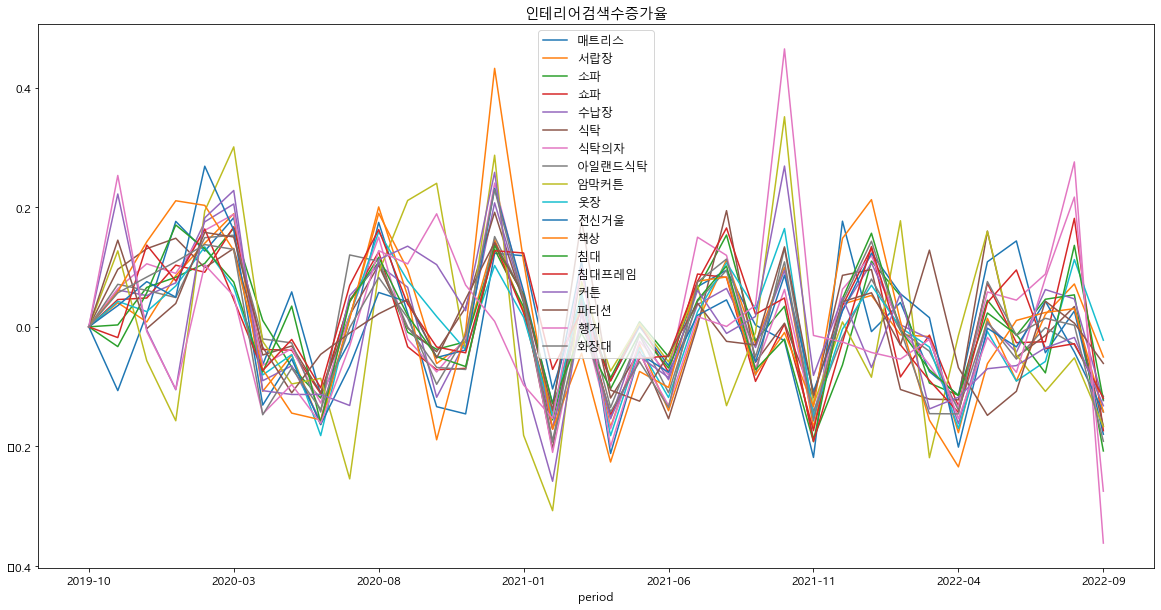

In [249]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
indf_pct.plot(figsize=(20,10), title='인테리어검색수증가율')

In [250]:
indf_cum = (indf_pct + 1).cumprod()

<AxesSubplot:title={'center':'인테리어검색수누적증가율'}, xlabel='period'>

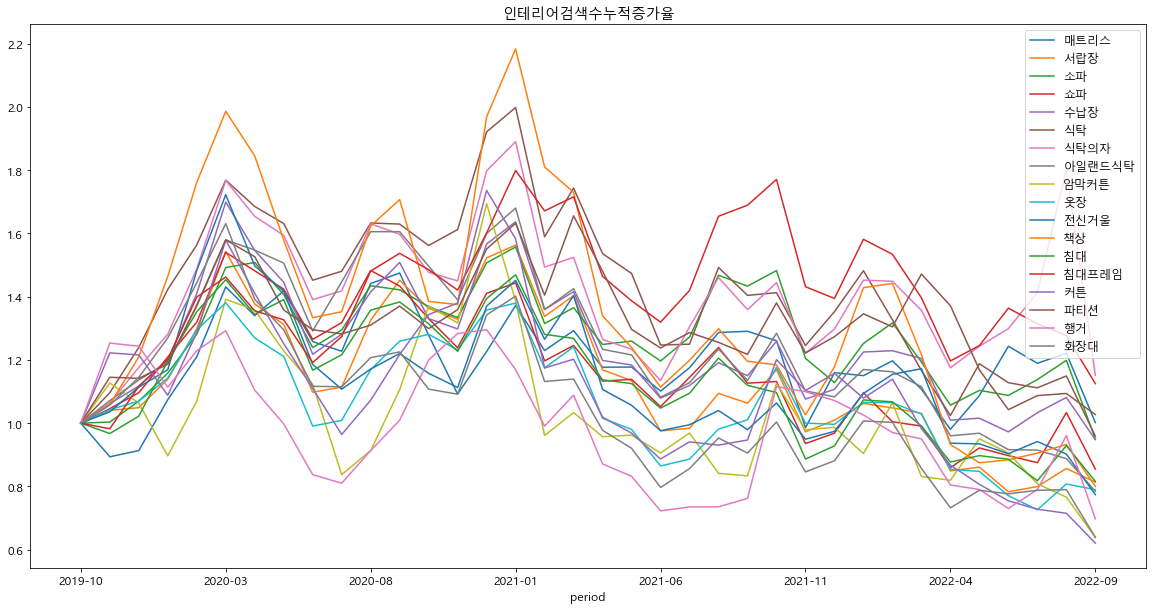

In [251]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
indf_cum.plot(figsize=(20,10), title='인테리어검색수누적증가율')

In [228]:
cldf_cum1 = cldf_cum.drop('여성숏패딩',axis=1)

<AxesSubplot:title={'center':'패션의류검색수누적증가율 - 여성숏패딩'}, xlabel='period'>

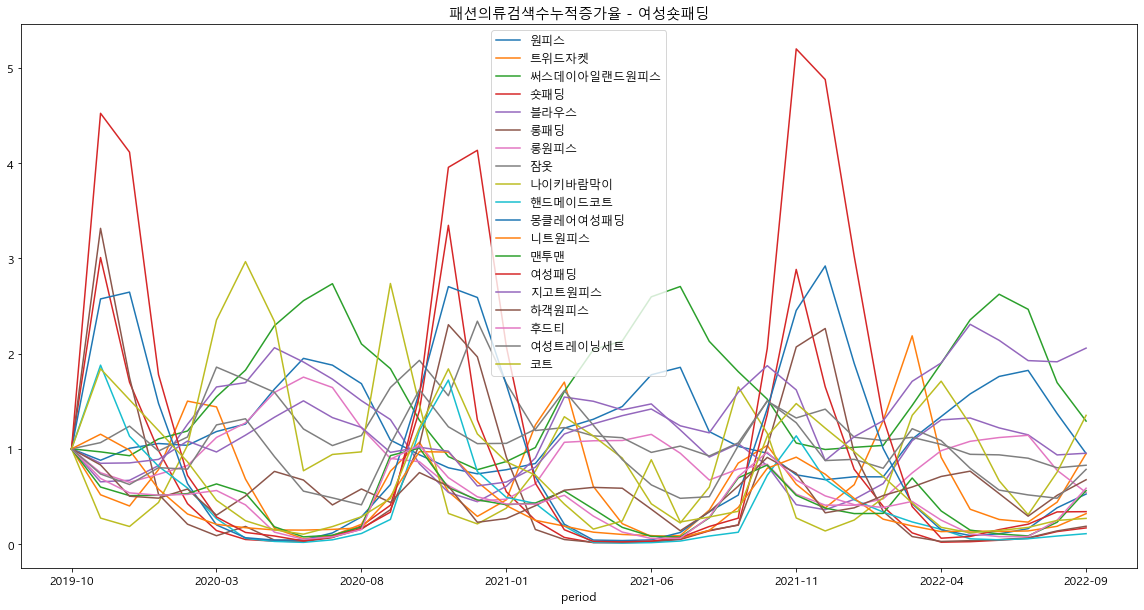

In [230]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
cldf_cum1.plot(figsize=(20,10), title='패션의류검색수누적증가율 - 여성숏패딩')

In [3]:
import pandas as pd
import numpy as np

In [64]:
codf = pd.read_csv('./data_files_pj01/nt20kw_3.csv')

In [65]:
codf = codf.drop('Unnamed: 0', axis=1)
codf.head()

,period,ahc아이크림,가히멀티밤,닥터지선크림,디올립글로우,록시땅핸드크림,모다모다블랙샴푸,바디로션,바디미스트,바디워시,...,선크림,설화수,설화수자음2종,염색약,인셀덤,인셀덤화장품,입생로랑쿠션,핸드크림,헤라블랙쿠션,헤어에센스
0,2019-10,78300,0,41900,35100,86900,0,62100,20500,48800,...,43100,66400,2040,43300,138700,33500,71000,55700,103200,55400
1,2019-11,90600,0,41800,39800,128500,0,84300,21800,50800,...,41700,72900,2540,43600,175600,38800,88700,95600,136800,59600
2,2019-12,102900,0,40700,61100,176700,0,76600,21300,55100,...,37100,81000,2860,51700,207800,42900,81700,96700,110800,59100
3,2020-01,132300,0,28700,121100,114000,0,68000,23900,68100,...,48700,97400,4320,59400,229900,41900,80800,53400,123500,67400
4,2020-02,107700,0,43300,89400,110900,0,63800,24800,64000,...,53100,65600,2050,59400,234100,38400,76600,62200,111400,67000


In [66]:
codf = codf.set_index('period')

In [67]:
codf_pct = codf.pct_change()
codf_pct.head()

,ahc아이크림,가히멀티밤,닥터지선크림,디올립글로우,록시땅핸드크림,모다모다블랙샴푸,바디로션,바디미스트,바디워시,샴푸,선크림,설화수,설화수자음2종,염색약,인셀덤,인셀덤화장품,입생로랑쿠션,핸드크림,헤라블랙쿠션,헤어에센스
period,,,,,,,,,,,,,,,,,,,,
2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11,0.157088,NaN,-0.002387,0.133903,0.478711,NaN,0.357488,0.063415,0.040984,0.073494,-0.032483,0.097892,0.245098,0.006928,0.266042,0.158209,0.249296,0.716338,0.325581,0.075812
2019-12,0.135762,NaN,-0.026316,0.535176,0.375097,NaN,-0.091340,-0.022936,0.084646,-0.061728,-0.110312,0.111111,0.125984,0.185780,0.183371,0.105670,-0.078918,0.011506,-0.190058,-0.008389
2020-01,0.285714,NaN,-0.294840,0.981997,-0.354839,NaN,-0.112272,0.122066,0.235935,0.007177,0.312668,0.202469,0.510490,0.148936,0.106352,-0.023310,-0.011016,-0.447777,0.114621,0.140440
2020-02,-0.185941,NaN,0.508711,-0.261767,-0.027193,NaN,-0.061765,0.037657,-0.060206,0.043943,0.090349,-0.326489,-0.525463,0.000000,0.018269,-0.083532,-0.051980,0.164794,-0.097976,-0.005935
2020-03,-0.086351,NaN,0.441109,-0.213647,-0.317403,NaN,0.213166,0.375000,0.042188,0.079636,0.354049,0.057927,0.141463,0.333333,-0.050833,-0.169271,-0.227154,0.008039,-0.182226,0.114925
2020-04,0.037602,NaN,0.299679,-0.260313,-0.092470,NaN,0.005168,-0.170088,-0.128936,-0.119073,0.165508,0.283862,0.867521,-0.143939,-0.024752,0.106583,-0.280405,-0.079745,-0.007684,-0.034806
2020-05,-0.222331,inf,0.392109,0.038462,0.000000,NaN,-0.361183,0.204947,0.005164,-0.027512,0.226730,-0.021324,-0.107551,-0.122419,0.025842,-0.014164,0.051643,-0.329289,0.183628,0.034674
2020-06,-0.297229,-0.725751,-0.144376,-0.337037,-0.589520,NaN,-0.249497,0.002933,0.121575,0.034440,0.091440,-0.353211,2.307692,-0.089076,-0.111111,0.333333,-0.111607,-0.390181,-0.065421,-0.163539


In [68]:
codf_pct = codf_pct.replace([np.inf, -np.inf], np.nan)

In [69]:
codf_pct = codf_pct.fillna(0)

In [70]:
codf_pct.head()

,ahc아이크림,가히멀티밤,닥터지선크림,디올립글로우,록시땅핸드크림,모다모다블랙샴푸,바디로션,바디미스트,바디워시,샴푸,선크림,설화수,설화수자음2종,염색약,인셀덤,인셀덤화장품,입생로랑쿠션,핸드크림,헤라블랙쿠션,헤어에센스
period,,,,,,,,,,,,,,,,,,,,
2019-10,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-11,0.157088,0.0,-0.002387,0.133903,0.478711,0.0,0.357488,0.063415,0.040984,0.073494,-0.032483,0.097892,0.245098,0.006928,0.266042,0.158209,0.249296,0.716338,0.325581,0.075812
2019-12,0.135762,0.0,-0.026316,0.535176,0.375097,0.0,-0.091340,-0.022936,0.084646,-0.061728,-0.110312,0.111111,0.125984,0.185780,0.183371,0.105670,-0.078918,0.011506,-0.190058,-0.008389
2020-01,0.285714,0.0,-0.294840,0.981997,-0.354839,0.0,-0.112272,0.122066,0.235935,0.007177,0.312668,0.202469,0.510490,0.148936,0.106352,-0.023310,-0.011016,-0.447777,0.114621,0.140440
2020-02,-0.185941,0.0,0.508711,-0.261767,-0.027193,0.0,-0.061765,0.037657,-0.060206,0.043943,0.090349,-0.326489,-0.525463,0.000000,0.018269,-0.083532,-0.051980,0.164794,-0.097976,-0.005935


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<AxesSubplot:title={'center':'화장품검색수증가율'}, xlabel='period'>

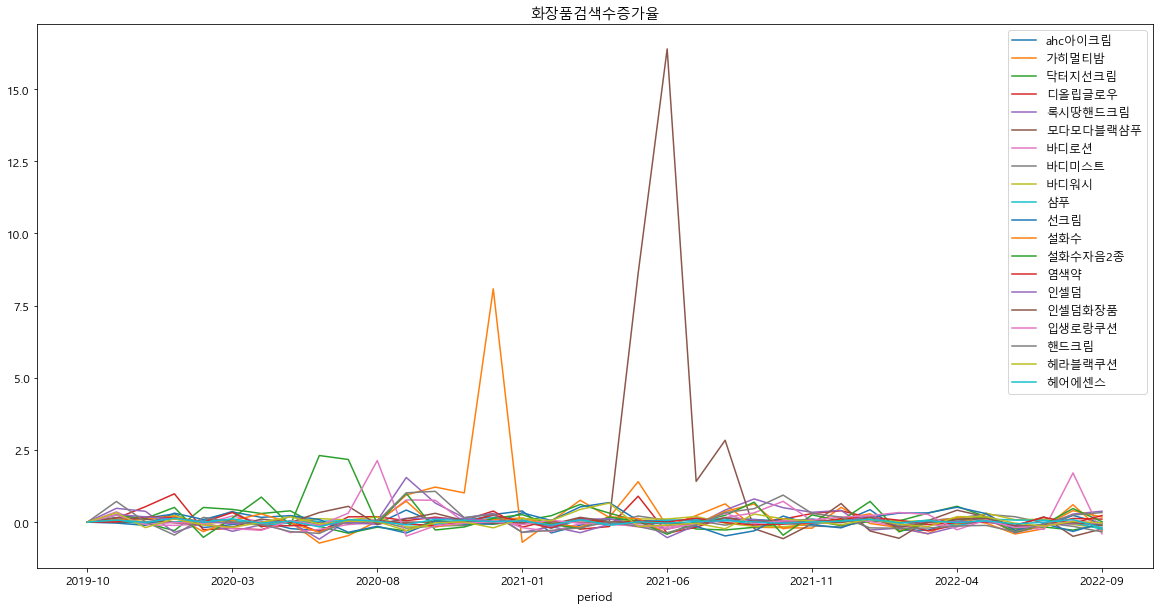

In [72]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
codf_pct.plot(figsize=(20,10), title='화장품검색수증가율')

In [71]:
codf_cum = (codf_pct + 1).cumprod()  # 복리 누적수익율

<AxesSubplot:title={'center':'화장품검색수누적증가율'}, xlabel='period'>

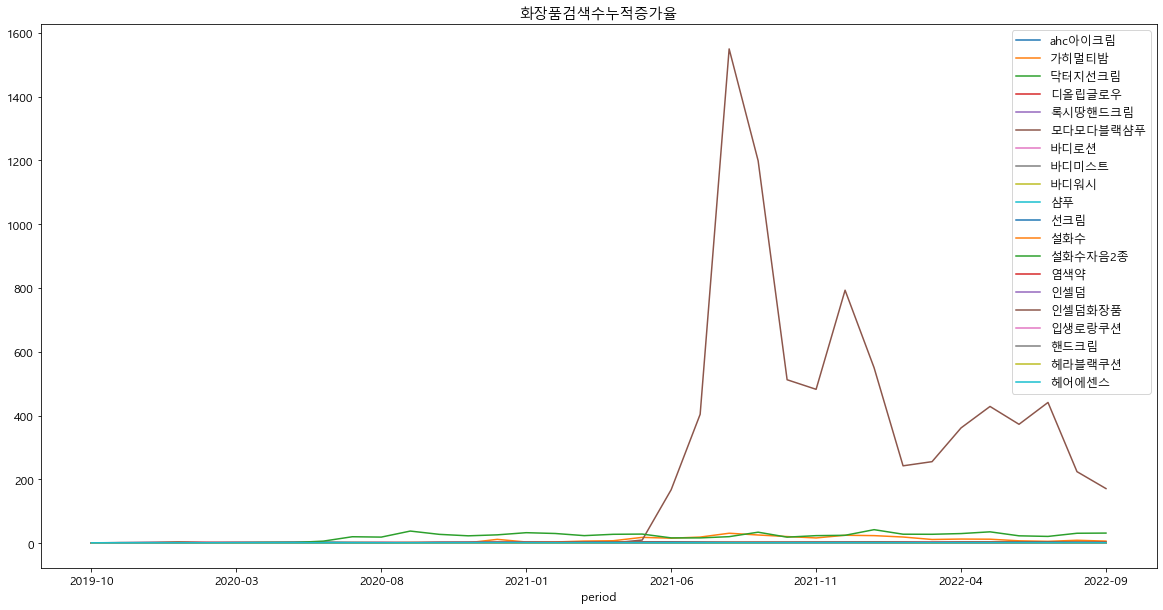

In [76]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
codf_cum.plot(figsize=(20,10), title='화장품검색수누적증가율')

In [74]:
codf_cum1 = codf_cum.drop('모다모다블랙샴푸',axis=1)

<AxesSubplot:title={'center':'화장품검색수누적증가율 - 모다모다블랙샴푸'}, xlabel='period'>

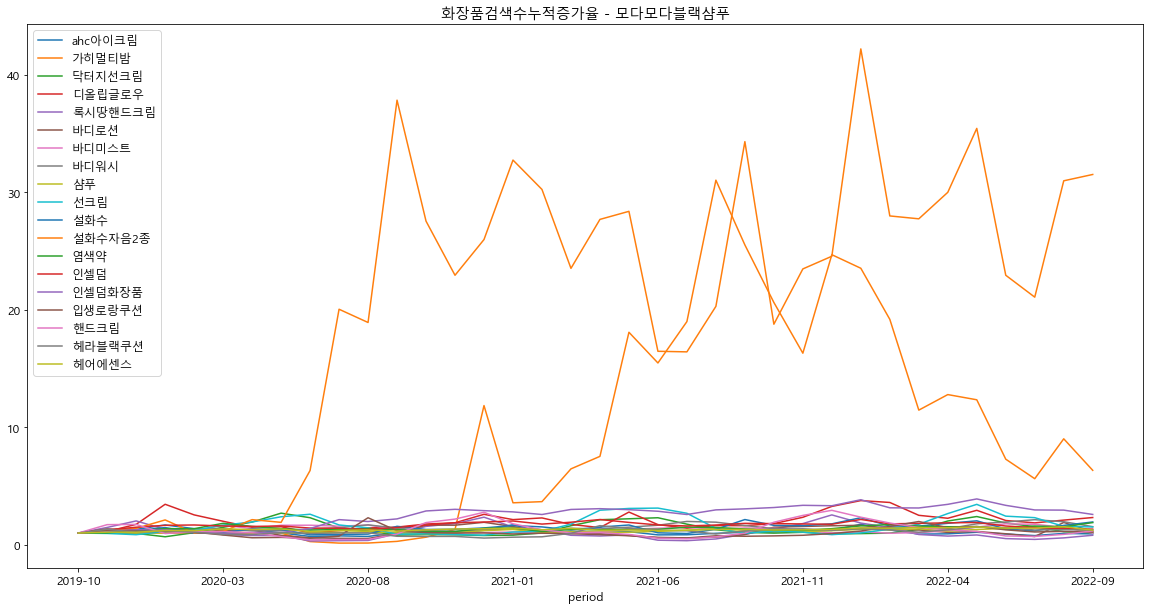

In [77]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
codf_cum1.plot(figsize=(20,10), title='화장품검색수누적증가율 - 모다모다블랙샴푸')

# 3. 급상승 검색어 상품 시세 연관성 비교
---

## (1) 네이버 금융 자료 불러오기
---

In [ ]:
import requests

In [13]:
url='https://api.finance.naver.com/siseJson.naver'
data = {
    'symbol': '251970', 
    'requestType': 1,
    'startTime': '20150801',
    'endTime': '20221020',
    'timeframe': 'month', 
}
headers={
    'header' : 'https://api.finance.naver.com/siseJson.naver',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
}
res = requests.post(url, headers=headers, data=data)
res.text

'\n [[\'날짜\', \'시가\', \'고가\', \'저가\', \'종가\', \'거래량\', \'외국인소진율\'],\n\n\t\n\t\n\t\t\n["20190731", 25990, 27800, 18800, 19550, 1796440, 1.0],\n\t\t\n["20190830", 19550, 25200, 15400, 16600, 2739997, 2.0],\n\t\t\n["20190930", 16550, 18050, 15700, 16150, 1793251, 2.0],\n\t\t\n["20191031", 16300, 17100, 14500, 16500, 1406867, 2.0],\n\t\t\n["20191129", 16650, 21350, 16150, 20400, 5308285, 0.0],\n\t\t\n["20191230", 20750, 21000, 17050, 18400, 1020471, 0.0],\n\t\t\n["20200131", 18350, 21450, 15250, 15550, 2641022, 0.0],\n\t\t\n["20200228", 15350, 17600, 13350, 13750, 1473825, 0.0],\n\t\t\n["20200331", 13750, 16150, 8710, 11900, 2048434, 0.0],\n\t\t\n["20200429", 11800, 16950, 11700, 16600, 2086421, 0.0],\n\t\t\n["20200529", 16300, 18700, 15750, 16350, 2085167, 1.0],\n\t\t\n["20200630", 16500, 17800, 14550, 16300, 1787215, 1.0],\n\t\t\n["20200731", 16100, 16850, 15000, 16050, 1271348, 1.0],\n\t\t\n["20200831", 16000, 17200, 14750, 15650, 1586671, 1.0],\n\t\t\n["20200929", 15650, 16550, 14450, 

In [14]:
data = json.loads(res.text)

JSONDecodeError: Expecting value: line 2 column 4 (char 4)

In [368]:
import pandas as pd
import numpy as np
import requests
import ast

url='https://api.finance.naver.com/siseJson.naver' # api 사이트
data = { # post 방식의 데이터를 출력하기 위한 데이터
    'symbol': '251970',  
    'requestType': 1,
    'startTime': '20191021',
    'endTime': '20221020',
    'timeframe': 'month', 
}
headers={ # 헤더에 적혀잇는 헤더 속성
    'header' : 'https://api.finance.naver.com/siseJson.naver',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
}

s_data=requests.post(url, headers=headers, data=data).text # api사이트에서 데이터를 text로 출력
s_data=s_data.strip().replace('\n','') # 줄 바꿈을 삭제함

stock=ast.literal_eval(s_data) # 텍스트 파일을 알맞는 리스트나 dict로 변경, 지금은 리스트가 된다.

stock=pd.DataFrame(stock,columns=stock[0]) # 첫번째 리스트가 칼럼으로 들어간 데이터프레임을 만듬
stock.drop(0, inplace=True) # 첫번째 행을 드랍함

In [369]:
stock

,날짜,시가,고가,저가,종가,거래량,외국인소진율
1,20191031,16300,17100,14500,16500,1406867,2.0
2,20191129,16650,21350,16150,20400,5308285,0.0
3,20191230,20750,21000,17050,18400,1020471,0.0
4,20200131,18350,21450,15250,15550,2641022,0.0
5,20200228,15350,17600,13350,13750,1473825,0.0
6,20200331,13750,16150,8710,11900,2048434,0.0
7,20200429,11800,16950,11700,16600,2086421,0.0
8,20200529,16300,18700,15750,16350,2085167,1.0
9,20200630,16500,17800,14550,16300,1787215,1.0
10,20200731,16100,16850,15000,16050,1271348,1.0


In [364]:
stock['날짜'] = pd.to_numeric(stock['날짜'])

In [346]:
stock['날짜']

1     20191031
2     20191129
3     20191230
4     20200131
5     20200228
6     20200331
7     20200429
8     20200529
9     20200630
10    20200731
11    20200831
12    20200929
13    20201030
14    20201130
15    20201230
16    20210129
17    20210226
18    20210331
19    20210430
20    20210531
21    20210630
22    20210730
23    20210831
24    20210930
25    20211029
26    20211130
27    20211230
28    20220128
29    20220228
30    20220331
31    20220429
32    20220531
33    20220630
34    20220729
35    20220831
36    20220930
37    20221020
Name: 날짜, dtype: int64

In [359]:
stock = stock.set_index('날짜')

In [360]:
stock = stock['종가']

<AxesSubplot:title={'center':'펌텍코리아'}>

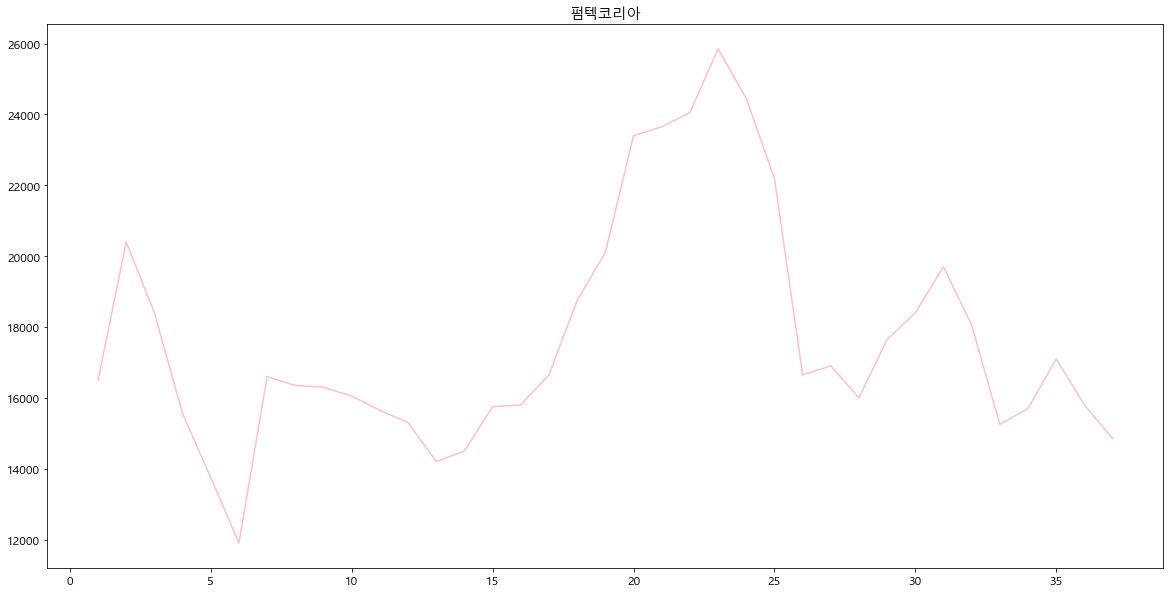

In [366]:
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

stock['종가'].plot(x='날짜',kind='line',figsize=(20,10), title='펌텍코리아', color='pink')

<AxesSubplot:title={'center':'펌텍코리아'}, xlabel='날짜'>

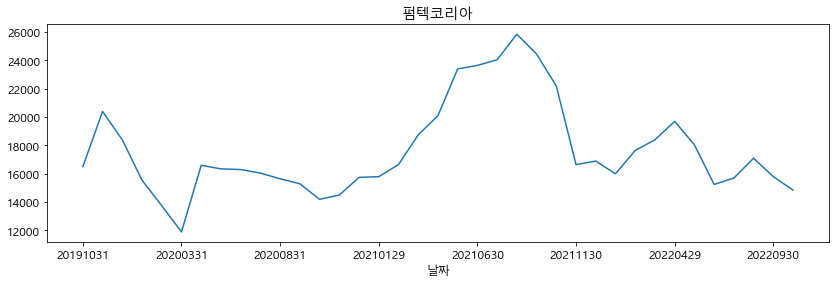

In [370]:
stock.set_index('날짜', inplace=True)


plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

stock['종가'].plot(x='날짜', title='펌텍코리아')

In [342]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      37 non-null     object
 1   시가      37 non-null     object
 2   고가      37 non-null     object
 3   저가      37 non-null     object
 4   종가      37 non-null     object
 5   거래량     37 non-null     object
 6   외국인소진율  37 non-null     object
dtypes: object(7)
memory usage: 2.2+ KB


## (2) 지앤코 브랜드 검색수

<AxesSubplot:xlabel='period'>

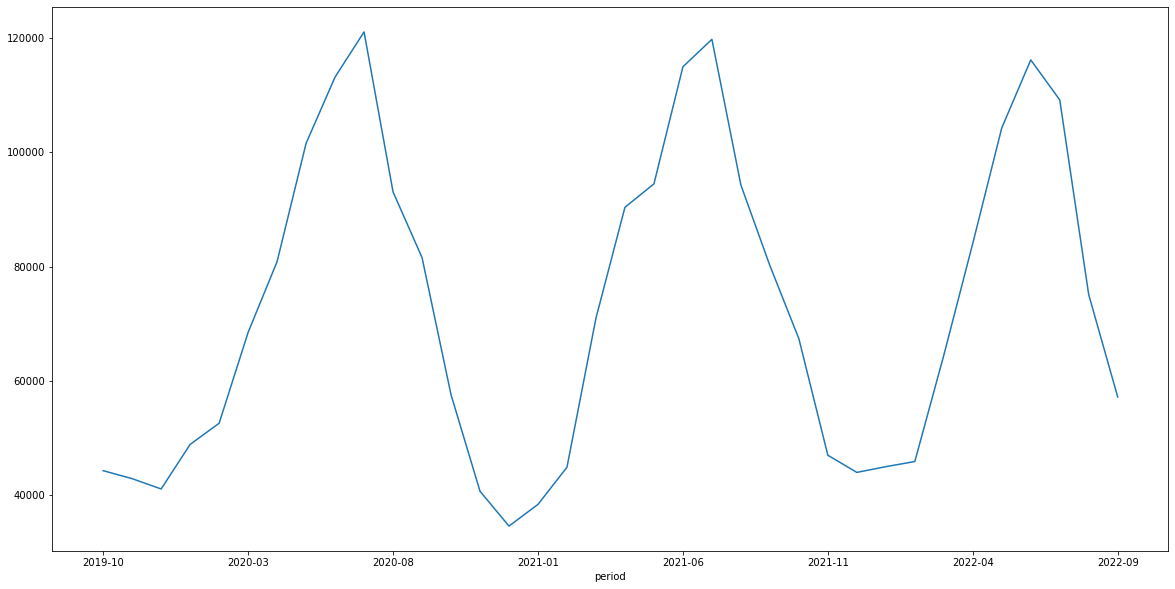

In [65]:
cldf['써스데이아일랜드원피스'].plot(kind='line', figsize=(20,10))

In [91]:
thir = pd.read_csv('./data_files_pj01/패션의류_03_써스데이아일랜드원피스_네이버_월간검색트렌드.csv')

In [94]:
thir = thir.rename(columns={'searchVolume':'써스데이아일랜드원피스'})

In [97]:
thir = thir.set_index('period')

In [98]:
thir

,써스데이아일랜드원피스
period,
2019-10,44300
2019-11,42900
2019-12,41100
2020-01,48900
2020-02,52600
2020-03,68500
2020-04,80900
2020-05,101600
2020-06,113200


In [99]:
covetblan = pd.read_csv('./data_files_pj01/covetblan_네이버_월간검색트렌드.csv')

In [100]:
covetblan = covetblan.rename(columns={'searchVolume':'covetblan'})

In [101]:
covetblan = covetblan.set_index('period')

In [113]:
covetblan

,covetblan
period,
2019-10,1560
2019-11,2460
2019-12,2010
2020-01,1380
2020-02,1110
2020-03,1030
2020-04,1020
2020-05,1490
2020-06,1100


In [102]:
etape = pd.read_csv('./data_files_pj01/etape_네이버_월간검색트렌드.csv')

In [103]:
etape = etape.rename(columns={'searchVolume':'etape'})

In [104]:
etape = etape.set_index('period')

In [114]:
etape

,etape
period,
2019-10,0
2019-11,0
2019-12,0
2020-01,0
2020-02,0
2020-03,0
2020-04,0
2020-05,50
2020-06,360


In [105]:
ti= pd.read_csv('./data_files_pj01/t.i for men_네이버_월간검색트렌드.csv')

In [106]:
ti = ti.rename(columns={'searchVolume':'ti'})

In [107]:
ti = ti.set_index('period')

In [115]:
ti

,ti
period,
2019-10,310
2019-11,480
2019-12,230
2020-01,220
2020-02,190
2020-03,170
2020-04,230
2020-05,190
2020-06,110


In [116]:
znco = pd.concat([thir, covetblan, etape, ti], axis=1)

In [112]:
znco.isnull().sum()

써스데이아일랜드원피스    108
covetblan      108
etape          108
ti             108
dtype: int64

In [117]:
znco

,써스데이아일랜드원피스,covetblan,etape,ti
period,,,,
2019-10,44300,1560,0,310
2019-11,42900,2460,0,480
2019-12,41100,2010,0,230
2020-01,48900,1380,0,220
2020-02,52600,1110,0,190
2020-03,68500,1030,0,170
2020-04,80900,1020,0,230
2020-05,101600,1490,50,190
2020-06,113200,1100,360,110


<AxesSubplot:title={'center':'znco 브랜드별 검색수'}, xlabel='period'>

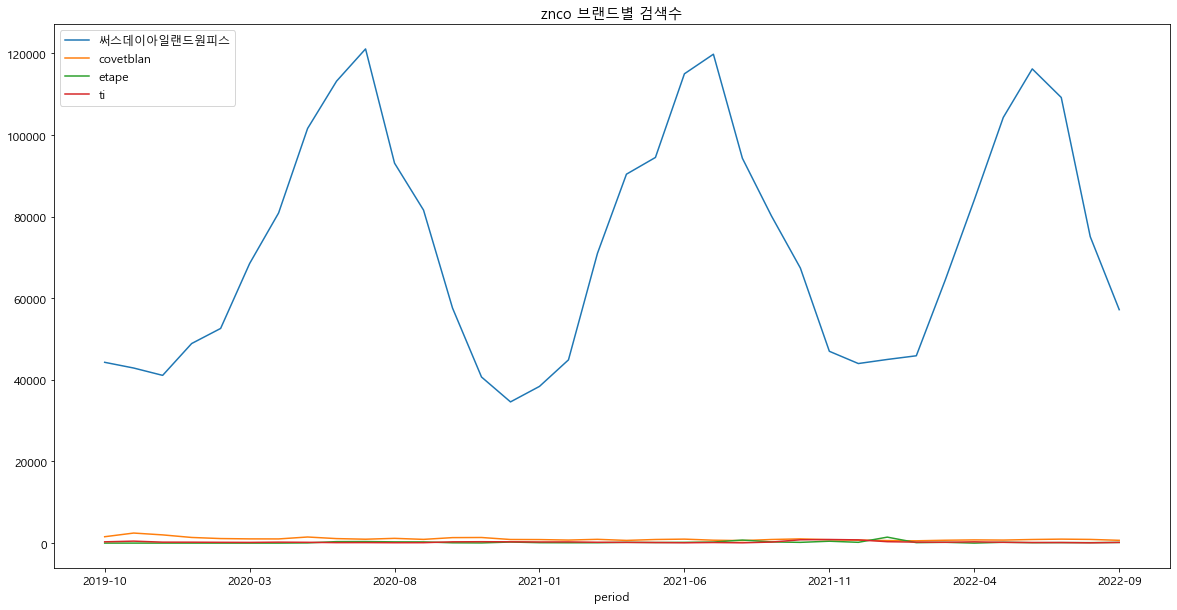

In [118]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
znco.plot(figsize=(20,10), title='znco 브랜드별 검색수')

In [120]:
znco3=znco.drop('써스데이아일랜드원피스', axis=1)

<AxesSubplot:title={'center':'znco 브랜드별 검색수'}, xlabel='period'>

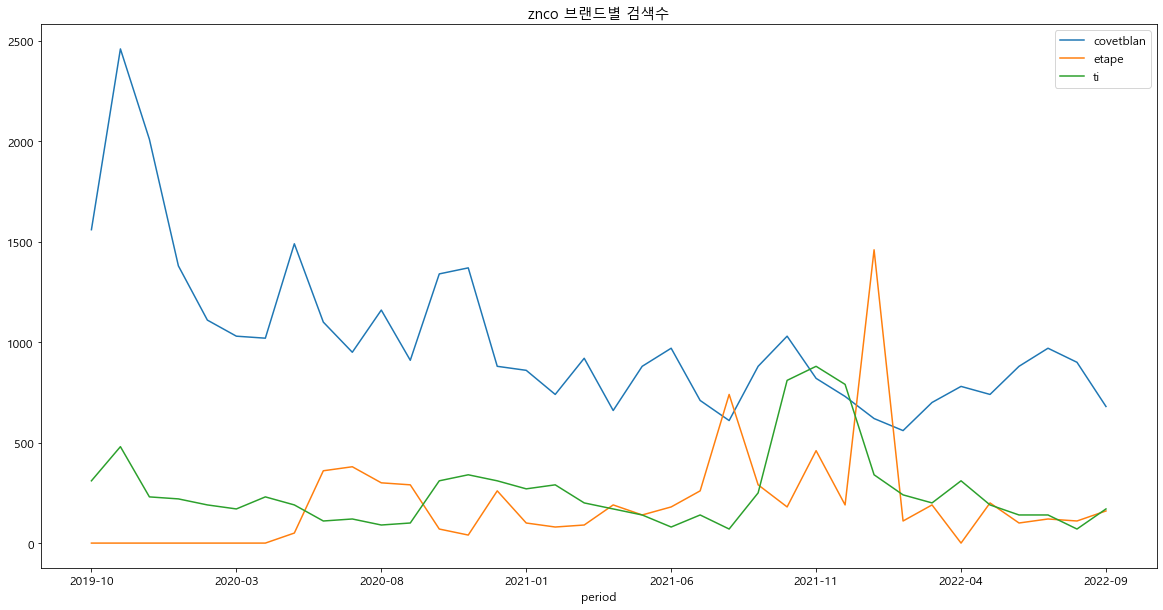

In [122]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
znco3.plot(figsize=(20,10), title='znco 브랜드별 검색수')

## (3) pie plot

In [410]:
znco = pd.read_excel('./data_files_pj01/gnc_p.xlsx')

In [411]:
znco = znco[['Unnamed: 4','Unnamed: 6','Unnamed: 8']]

In [412]:
znco = znco.rename(columns={'Unnamed: 4':'제24기', 'Unnamed: 6':'제24기', 'Unnamed: 8': '제23기'})

In [413]:
znco

,제24기,제24기,제23기
0,NaN,NaN,NaN
1,금액,금액,금액
2,73182,"62,695",71922
3,2218,2284,3563
4,645,530,675
5,76045,65509,76160
6,2749,3416,4724
7,70,78,112
8,9,27,15
9,2828,3521,4851


In [414]:
znco1 = znco.iloc[[5,9,13]]

In [415]:
znco1.index = ['THURSDAYILAND','COVET_ETA','TIFORMAN']

In [416]:
znco1['소계'] = znco1.sum(axis=1)

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_7824\89027571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  znco1['소계'] = znco1.sum(axis=1)


In [417]:
znco1

,제24기,제24기,제23기,소계
THURSDAYILAND,76045,65509,76160,217714.0
COVET_ETA,2828,3521,4851,11200.0
TIFORMAN,10871,12794,19879,43544.0


In [418]:
znco = znco.iloc[[5,9,13,37]]

In [419]:
znco.index = ['THURSDAYILAND','COVET_ETA','TIFORMAN','합계']

In [421]:
znco['소계'] = znco.sum(axis=1)

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_7824\3202490443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  znco['소계'] = znco.sum(axis=1)


In [422]:
znco

,제24기,제24기,제23기,소계
THURSDAYILAND,76045,65509,76160,217714.0
COVET_ETA,2828,3521,4851,11200.0
TIFORMAN,10871,12794,19879,43544.0
합계,135409,128166,155910,419485.0


In [423]:
znco.iloc[3]

제24기      135409
제24기      128166
제23기      155910
소계      419485.0
Name: 합계, dtype: object

In [424]:
znco1.loc['기타']= znco.iloc[3] - znco1.sum(axis=0)

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_7824\1894722418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  znco1.loc['기타']= znco.iloc[3] - znco1.sum(axis=0)


In [427]:
znco1

,제24기,제24기,제23기,소계
THURSDAYILAND,76045,65509,76160,217714.0
COVET_ETA,2828,3521,4851,11200.0
TIFORMAN,10871,12794,19879,43544.0
기타,45665,46342,55020,147027.0


In [425]:
znco1['소계'].values

array([217714.,  11200.,  43544., 147027.])

In [436]:
import matplotlib.pyplot as plt
# 맑은고딕으로 폰트 설정
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac 맑은 고딕
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

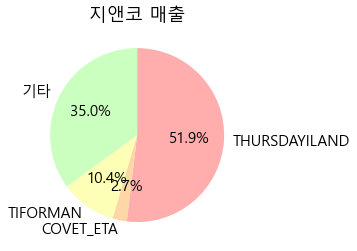

In [437]:
labels = ['THURSDAYILAND','COVET_ETA','TIFORMAN','기타']
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf'] # 그래프 색깔 지정
# explode = [0.05] * 6  # 그래프 label 간격 지정

plt.pie(znco1['소계'].values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('지앤코 매출')
plt.show()

In [ ]:
# # 아이템스카우트 Top500 시계열 자료 추출 코드

# from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# import time
# import pyautogui
# import re
# import pandas as pd
# import os

# url='https://itemscout.io/keyword'
# driver = webdriver.Chrome()
# driver.get(url)
# driver.maximize_window() # 최대화면으로 만들기
# time.sleep(0.5)
# driver.implicitly_wait(120) # 2분안에 웹페이지가 바로 로딩되면 다음코드 실행하기
# wait = WebDriverWait(driver, 120) # 2분내로 조건이 완료되면 다음 코드 실행

    
# pu = driver.find_element(By.CLASS_NAME, 'btn-cancel') # 팝업창 끄는 버튼 찾기
# pu.click() # 팝업창 끄기

# for r in rank: # rank는 뽑을 상품이름 리스트, 상품이름 리스트에서 20개까지..
#     db=[] # 데이터 리스트 만들기
#     db.append(r) # 상품이름 추가
    
#     key=driver.find_element(By.CLASS_NAME, 'input-keyword') # 검색창 찾기
#     key.clear() # 검색창 초기화
#     key.send_keys(r) # 검색창에 r를 넣기
    
#     search=driver.find_element(By.CLASS_NAME, 'btn-search-keyword') # 검색창 버튼 찾기
#     search.click() # 검색창 버튼 누르기
    
#     # 2분내로 그래프가 로딩될경우 다음 코드 실행
#     wait.until(EC.presence_of_element_located((By.CLASS_NAME, "chartjs-render-monitor"))) 
    
#     for i in range(100000000000): # 무한반복문인데 while문보다 빨라서 for문으로 바꿈
#         try:
#             duration=driver.find_elements(By.CLASS_NAME, 'duration-button') # 그래프의 기간 버튼 찾기
#             duration[0].click() # [0]이면 3년, [1]이면 1년, [2]이면 1개월, [3]이면 직업입력
#             if duration[0]==driver.find_element(By.CLASS_NAME, 'duration-button.active'): # 클릭한 기간이 제대로 작동하면 break를 함
#                 break
#         except:
#             continue

#     count=driver.find_element(By.CLASS_NAME, 'duration-dropdown.active') # 차트 간격 팝업버튼찾기
#     count.click()# 차트 간격 팝업버튼 누르기
   
#     t_count=driver.find_elements(By.CLASS_NAME, 'duration-dropdown-select') # 차트간격 버튼 찾기
#     t_count[2].click() # [0]이면 1일, [1]이면 7일, [2]이면 1개월
    
#     # 조회하기 버튼 클릭
#     lookup=driver.find_element(By.CSS_SELECTOR, 'div.multi-chart-view-header button.d-inline-block.v-btn.v-btn--has-bg.theme--light.v-size--default.primary')
#     lookup.click()
    
#     check=0 # 중복확인을 위해 0을 집어넣음
    
#     # 2분내로 그래프가 로딩될경우 다음 코드 실행
#     wait.until(EC.presence_of_element_located((By.CLASS_NAME, "chartjs-render-monitor"))) 
    
    
#     for i in range(81):
        
#         graph=driver.find_element(By.CLASS_NAME, 'd-inline-block') # 종합차트 텍스트 찾기
#         driver.execute_script("arguments[0].scrollIntoView(true);", graph) # 그 텍스트로 화면 이동
        
#         pyautogui.moveTo(480+(i*10),457)  # 노가다해서 그래프 왼쪽위 검색수랑 날짜 뽑기
#         try:
#             g_columns=driver.find_element(By.CSS_SELECTOR, '#graph-container-chart-tooltip>table>thead>tr>th') # 날짜 데이터 추출
#             if g_columns.text!=check: # 날짜 데이터가 같지 않을경우(중복데이터 제외) 실행
            
#                 graph=driver.find_element(By.CSS_SELECTOR, '#graph-container-chart-tooltip>table>tbody>tr') # 검색수량 추출  
#                 numbers = re.sub(r'[^0-9]', '',graph.text) # 검색수량에서 숫자를 제외한 모든 글자 삭제
#                 db.append(numbers) # 데이터리스트에 검색수량 추가
                
#                 if len(t_columns)<37: # 3년이므로 상품이름까지 더한 데이터 칼럼의 수가 37개가 될때까지 실행   
#                     if g_columns.text!='':
#                         t_columns.append(g_columns.text) # 데이터칼럼에 날짜 추가
            
#             check=g_columns.text
#         except:
#             pyautogui.moveTo(480+(i*10),455)
#             continue

#     f=open('./data_files/화장품/{}.txt'.format(db[0]), 'w') # db[0]은 상품 이름
#     for t in db:
#         f.write(t)
#         f.write('\n')
#     f.close()